<a href="https://colab.research.google.com/github/jakub-porowski/PwcRecruitmentTask/blob/main/INDPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [27]:
url = "https://raw.githubusercontent.com/jakub-porowski/PwcRecruitmentTask/main/clean_csv.csv"
Case = pd.read_csv(url, sep=";")
Case = Case.drop(axis=0, index=0)
Case

,y,x1,x2,x3,x4,x5
1,104.7474,2.837,4.04,1462.59,4.4,405948
2,104.8129,2.578,3.56,1736.47,4.6,405466
3,104.4135,2.793,3.13,1688.85,18.0,403957
4,104.4852,3.283,3.10,1822.57,4.4,400415
5,103.9464,4.049,3.25,1824.05,11.7,394222
...,...,...,...,...,...,...
270,93.1620,0.896,6.15,2209.90,20.9,117295
271,92.8872,0.732,5.85,2391.20,14.7,116631
272,92.3118,0.857,6.05,1946.30,19.4,115932
273,91.9626,0.819,6.23,1852.90,37.9,115573


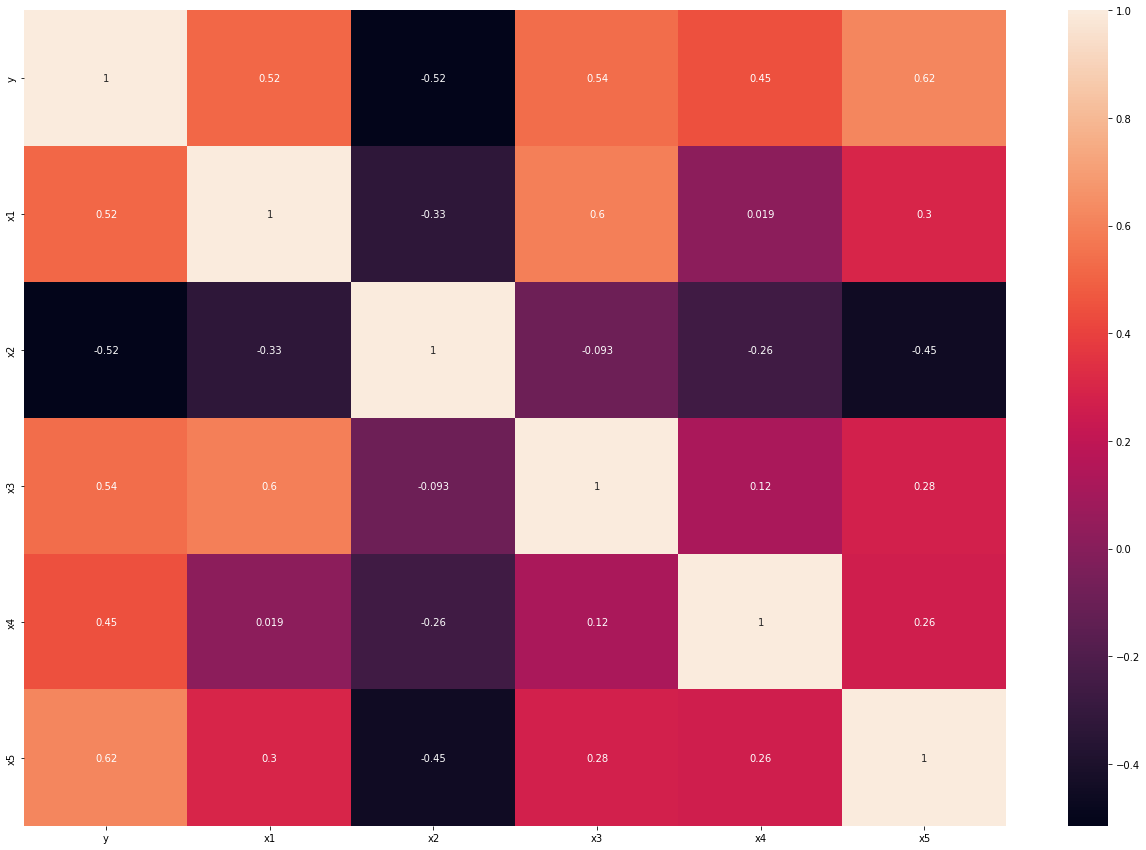

In [ ]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(Case.corr(), annot=True, ax=ax);

In [28]:
ToDrop = ["x1","x2","x3","x4","x5"]
Data = Case.drop(columns=["y"])
Target = Case["y"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=.15, random_state=100)

In [42]:
LR = LinearRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
r2_score(y_test, predLR)

0.7690045120942707

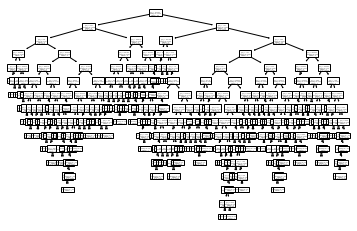

0.9521040675129822

In [32]:
Tree = DecisionTreeRegressor()
Tree.fit(X_train, y_train)
plot_tree(Tree)
plt.show()
predTree = Tree.predict(X_test)
r2_score(y_test, predTree)

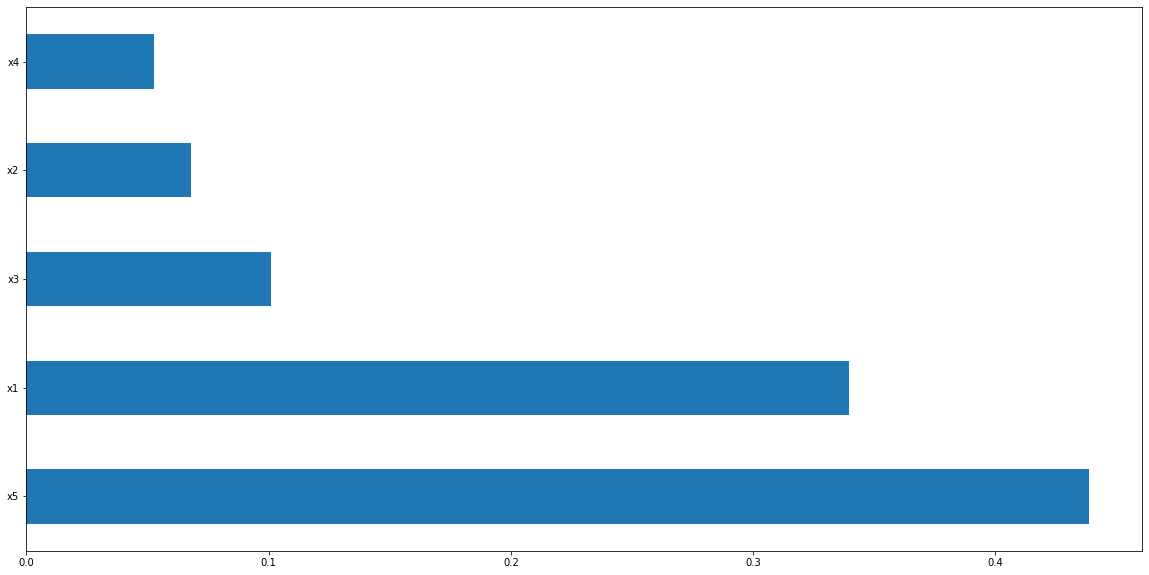

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
feat_importances = pd.Series(Tree.feature_importances_, index=Data.columns)
feat_importances.nlargest(50).plot(kind='barh')

In [ ]:
url2 = "https://raw.githubusercontent.com/jakub-porowski/PwcRecruitmentTask/main/Target.csv"
YPredictionFeatureValues = pd.read_csv(url2, sep=";")
YpredictionResult = Tree.predict(YPredictionFeatureValues)
YpredictionResult

array([104.7474])

# Bonus* There is a ML code written by Chat Gpd, fortunately for me, less effective than mine ☺

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Convert the CSV text into a Pandas DataFrame
url = "https://raw.githubusercontent.com/jakub-porowski/PwcRecruitmentTask/main/clean_csv.csv"
data = pd.read_csv(url, sep=";")
data = data.drop(axis=0, index=0)


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the predictions
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


R-squared: 0.6397836412981072


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score

# Convert the CSV text into a Pandas DataFrame
url = "https://raw.githubusercontent.com/jakub-porowski/PwcRecruitmentTask/main/clean_csv.csv"
data = pd.read_csv(url, sep=";")
data = data.drop(axis=0, index=0)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2)

# Train a decision tree regressor model on the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


R-squared: 0.7532863783128669
